# Read Me

# Imports

In [3]:
import xarray as xr

from datetime import datetime
import numpy as n
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from netcdftime import utime
import datetime as datetime

import bisect
import numpy as np

In [4]:
plt.rcParams['figure.figsize'] = (10.0, 8)


In [5]:
plt.style.available

['seaborn-muted',
 'fast',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-colorblind',
 'grayscale',
 'seaborn-deep',
 'seaborn-talk',
 'tableau-colorblind10',
 'seaborn-notebook',
 'fivethirtyeight',
 'seaborn-white',
 'bmh',
 'seaborn-dark',
 'seaborn-bright',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'seaborn-whitegrid',
 'Solarize_Light2',
 'seaborn-poster',
 'classic',
 'seaborn-dark-palette',
 'ggplot',
 'seaborn-paper',
 'seaborn',
 'dark_background']

In [5]:
plt.style.use('seaborn-whitegrid')

In [6]:
#import cartopy # to check the correct environment

In [6]:
filename3_ = '/home/ollie/muali/Data/Cloud_data2/shbclouds.19971020.19981001.cdf'
ds_cloud2 = xr.open_dataset(filename3_)

In [7]:
ds_cloud2

<xarray.Dataset>
Dimensions:      (time: 50112)
Dimensions without coordinates: time
Data variables:
    dtime        (time) float32 ...
    cldpresence  (time) int16 ...
    oper_r       (time) int16 ...
    oper_l       (time) int16 ...
    lb_b         (time) float32 ...
    lb_bt        (time) float32 ...
    lb_e         (time) float32 ...
    lb_et        (time) float32 ...
    lb_ei        (time) int16 ...
    lb_r         (time) float32 ...
    lb_l         (time) float32 ...
    ht_e         (time) float32 ...
    ht_et        (time) float32 ...
    ht_ei        (time) int16 ...
    ht_r         (time) float32 ...
    ht_l         (time) float32 ...
    ct_r         (time) float32 ...
    ct_l         (time) float32 ...
    nl_m         (time) int16 ...
    nl_i         (time) int16 ...
    nl_r         (time) int16 ...
    nl_l         (time) int16 ...
    liqpresent   (time) int16 ...
    liqheight    (time) float32 ...
    liqtemp      (time) float32 ...
    atten        (t

In [8]:
ds_cloud2.dtime

<xarray.DataArray 'dtime' (time: 50112)>
array([293.     , 293.00696, 293.0139 , ..., 640.9792 , 640.9861 , 640.99304],
      dtype=float32)
Dimensions without coordinates: time
Attributes:
    long_name:  Day number, decimal
    comment:    Calculated from 1/1/1997
    interval:   10-minute

In [18]:
ds_cloud2.attrs

OrderedDict([('file_created', 'November 17, 2000'),
             ('experiment', 'Surface Heat Budget of the Arctic Ocean - SHEBA'),
             ('file_coverage', 'October 20, 1997 - October 1, 1998'),
             ('file_description',
              'This file combines radar, lidar, and sounding measurements to give a comprehensive description of bulk cloud properties during SHEBA'),
             ('radar_platform',
              'Merged radar cloud boundaries from the MMCR (Uttal)'),
             ('lidar_platform',
              'Preliminary 10-min CLD files (layer averages) from DABUL (Intrieri)'),
             ('sounding_platform',
              'Rawinsonde text files (Moritz), interpolated to time-height grid'),
             ('radar_processing',
              'To degrade from 10-sec resolution, one radar beam is selected every 10 minutes'),
             ('flags',
              'Missing data values of -999 and -1 were used for floats and shorts, respectively'),
             ('note',


In [9]:
#checking conversion from JDD to date-time
cdftime = utime('days since 1997-01-01 00:00:00') #defined wrt SHEBA wrt to days and not hours
#date = datetime.now()
#print (date)
#type(date)
t3 = 1 #jan 1,1997 is JD1 for Sheba
date3 = cdftime.num2date(t3)
print (date3)


1997-01-02 00:00:00


Instead of converting every JDD time to datetime, just adding a time attribute should automatically make xarray intelligently load time

In [11]:
test = 293.96
cdftime.num2date(test)


datetime.datetime(1997, 10, 20, 23, 2, 24)

In [11]:
t_file = cdftime.num2date(ds_cloud2.dtime) # for converting into time
ds_cloud2.dtime.values = t_file
# has 10 min time intervals

ValueError: year 5874656 is out of range

In [22]:
ds_cloud2.dtime[10300:10400]

<xarray.DataArray 'dtime' (time: 100)>
array(['1997-12-31T12:39:59.414055000', '1997-12-31T12:50:00.585930000',
       '1997-12-31T12:59:59.121086000', '1997-12-31T13:10:00.292961000',
       '1997-12-31T13:19:58.828118000', '1997-12-31T13:30:00.000000000',
       '1997-12-31T13:40:01.171868000', '1997-12-31T13:49:59.707024000',
       '1997-12-31T14:00:00.878899000', '1997-12-31T14:09:59.414055000',
       '1997-12-31T14:20:00.585930000', '1997-12-31T14:29:59.121086000',
       '1997-12-31T14:40:00.292961000', '1997-12-31T14:49:58.828118000',
       '1997-12-31T15:00:00.000000000', '1997-12-31T15:10:01.171868000',
       '1997-12-31T15:19:59.707024000', '1997-12-31T15:30:00.878899000',
       '1997-12-31T15:39:59.414055000', '1997-12-31T15:50:00.585930000',
       '1997-12-31T15:59:59.121086000', '1997-12-31T16:10:00.292961000',
       '1997-12-31T16:19:58.828118000', '1997-12-31T16:30:00.000000000',
       '1997-12-31T16:40:01.171868000', '1997-12-31T16:49:59.707024000',
       '1997

## approach1 

use slicing method in xarray

In [23]:
# filter values
ds_cloud2.lb_b.values[ds_cloud2.lb_b.values == -999] = np.nan

In [24]:
ds_cloud2['time'] = ds_cloud2.dtime

In [15]:
len(mask_time)

NameError: name 'mask_time' is not defined

In [25]:
ds_cloud2.dtime

<xarray.DataArray 'dtime' (time: 50112)>
array(['1997-10-21T00:00:00.000000000', '1997-10-21T00:10:01.171868000',
       '1997-10-21T00:19:59.707024000', ..., '1998-10-03T23:30:01.757805000',
       '1998-10-03T23:39:57.656243000', '1998-10-03T23:49:58.828118000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1997-10-21 ... 1998-10-03T23:49:58.828118
Attributes:
    long_name:  Day number, decimal
    comment:    Calculated from 1/1/1997
    interval:   10-minute

In [26]:
ds_cloud2.lb_b.sel(time=slice('1998-01-04', '1998-01-05 00:00'))

<xarray.DataArray 'lb_b' (time: 145)>
array([0.105, 0.105, 0.09 , 0.09 , 0.09 , 0.09 , 0.09 , 0.09 , 0.09 , 0.09 ,
       0.09 , 0.09 , 0.09 , 0.09 , 0.09 , 0.09 , 0.09 , 0.09 , 0.09 , 0.09 ,
       0.09 , 0.09 , 0.09 , 0.09 , 0.12 , 0.105, 0.105, 0.105, 0.105, 0.105,
       0.105, 0.105, 0.105, 0.105, 2.241, 1.882, 1.015, 1.015, 0.926, 0.776,
       0.746, 0.657, 0.627, 0.597, 0.627, 0.627, 0.567, 0.567, 0.567, 0.537,
       0.507, 0.448, 0.507, 0.448, 0.448, 0.418, 0.418, 0.418, 0.388, 0.388,
       0.388, 0.448, 0.448, 0.418, 0.388, 0.418, 0.418, 0.388, 0.388, 0.388,
       0.388, 0.388, 0.358, 0.358, 0.358, 0.388, 0.388, 0.388, 0.388, 0.358,
       0.358, 0.358, 0.358, 0.418, 0.388, 0.418, 0.388, 0.388, 0.358, 0.358,
       0.388, 0.358, 0.388, 0.358, 0.268, 0.298, 0.328, 0.358, 0.328, 0.328,
       0.328, 0.298, 0.239, 0.298, 1.015, 0.956, 0.956, 0.926, 0.896, 0.926,
       0.926, 0.926, 0.956, 0.986, 0.986, 0.986, 0.986, 0.986, 1.015, 1.015,
       1.015, 0.956, 0.956, 0.926, 0.9

In [52]:
ds_cloud2.lb_b.attrs

OrderedDict([('long_name', 'Lowest cloud base height, best estimate'),
             ('comment1',
              'Lidar base is used unless lidar was not operational'),
             ('comment2',
              'When lidar inoperable, radar base may be biased low by precipitation'),
             ('units', 'km AGL')])

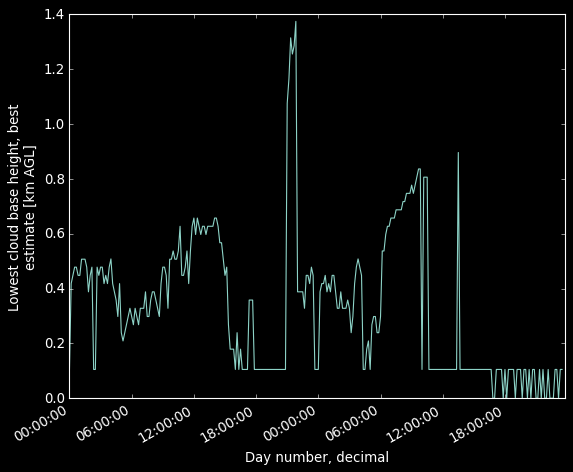

In [72]:
ds_cloud2.lb_b.sel(time=slice('1998-01-04', '1998-01-05')).plot()

In [29]:
import seaborn as sns

In [38]:
sns.set_style('whitegrid')

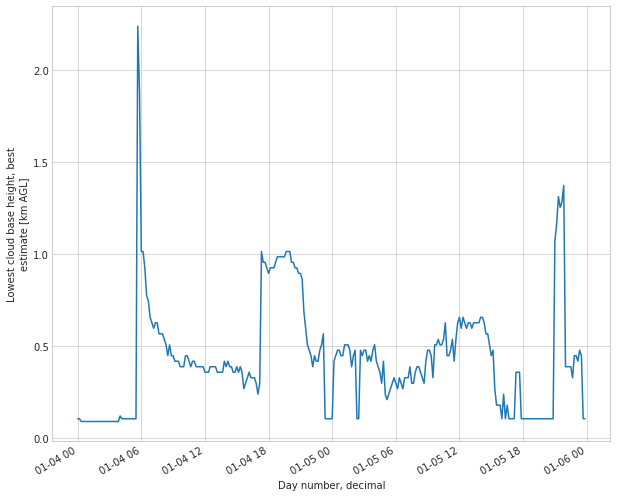

In [39]:
# updated
ds_cloud2.lb_b.sel(time=slice('1998-01-04', '1998-01-05')).plot();

In [40]:
ds_cloud2.lb_b.sel(time=slice('1998-01-04-22:30', '1998-01-05 23:30')).mean()

<xarray.DataArray 'lb_b' ()>
array(0.398662, dtype=float32)

Lowest cloud base for Jan 4 23:00 is 301 m

In [41]:
ds_cloud2.lb_b.sel(time=slice('1998-01-04-12:00', '1998-01-04 13:00')).mean()

<xarray.DataArray 'lb_b' ()>
array(0.375143, dtype=float32)

In [42]:
ds_cloud2.lb_b.sel(time=slice('1998-01-10-22:30', '1998-01-10 23:30')).mean()

<xarray.DataArray 'lb_b' ()>
array(0.132286, dtype=float32)

Lowest cloud base for Jan 10th 23:00 is 102.9 m

In [43]:
ds_cloud2.lb_b.sel(time=slice('1998-01-12-10:30', '1998-01-12 11:30')).mean()

<xarray.DataArray 'lb_b' ()>
array(0.187571, dtype=float32)

In [24]:
ds_cloud2.ht_e.sel(time=slice('1998-01-12-10:30', '1998-01-12 11:30')).mean()

<xarray.DataArray 'ht_e' ()>
array(0.198429, dtype=float32)

In [86]:
ds_cloud2.ht_e.sel(time=slice('1998-01-10-22:30', '1998-01-10 23:30')).mean()

<xarray.DataArray 'ht_e' ()>
array(0.542143, dtype=float32)

In [84]:
ds_cloud2.lb_b.sel(time=slice('1997-12-07-22:30', '1997-12-07 23:30')).mean()

<xarray.DataArray 'lb_b' ()>
array(0.09, dtype=float32)

In [14]:
ds_cloud2.lb_b.sel(time=slice('1998-01-28-22:30', '1998-01-28 23:30')).mean()

<xarray.DataArray 'lb_b' ()>
array(0.657, dtype=float32)

In [17]:
ds_cloud2.ht_e.sel(time=slice('1998-01-28-22:30', '1998-01-28 23:30')).mean()

<xarray.DataArray 'ht_e' ()>
array(4.630714, dtype=float32)

LCB for 7th Dec 23:00 : 338.6 m

In [88]:
ds_cloud2.ht_e.sel(time=slice('1997-12-07-22:30', '1997-12-07 23:30')).mean()

<xarray.DataArray 'ht_e' ()>
array(7.125, dtype=float32)

In [87]:
ds_cloud2.lb_b.sel(time=slice('1997-12-07-11:00', '1997-12-07 12:00')).mean()

<xarray.DataArray 'lb_b' ()>
array(0.09, dtype=float32)

## Cloud top

In [44]:
ds_cloud2.ht_e.values[ds_cloud2.ht_e.values == -999] =np.nan

In [45]:
ds_cloud2.ht_e

<xarray.DataArray 'ht_e' (time: 50112)>
array([7.395, 7.395, 7.395, ..., 0.   , 0.   , 0.   ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1997-10-21 ... 1998-10-03T23:49:58.828118
Attributes:
    long_name:  Highest return height (Highest cloud top, best estimate)
    comment:    Highest return height measured by radar and lidar
    units:      km AGL

In [46]:
ds_cloud2.ht_e.sel(time=slice('1998-01-04 22:30', '1998-01-04 23:30')).time

<xarray.DataArray 'time' (time: 7)>
array(['1998-01-04T22:30:00.000000000', '1998-01-04T22:40:01.171868000',
       '1998-01-04T22:49:59.707024000', '1998-01-04T23:00:00.878899000',
       '1998-01-04T23:09:59.414055000', '1998-01-04T23:20:00.585930000',
       '1998-01-04T23:29:59.121086000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1998-01-04T22:30:00 ... 1998-01-04T23:29:59.121086
Attributes:
    long_name:  Day number, decimal
    comment:    Calculated from 1/1/1997
    interval:   10-minute

In [50]:
ds_cloud2.ht_e.sel(time=slice('1998-01-04-22:30', '1998-01-04 23:30'))

<xarray.DataArray 'ht_e' (time: 7)>
array([1.005, 1.095, 1.095, 1.185, 1.185, 1.095, 1.005], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-04T22:30:00 ... 1998-01-04T23:29:59.121086
Attributes:
    long_name:  Highest return height (Highest cloud top, best estimate)
    comment:    Highest return height measured by radar and lidar
    units:      km AGL

1.67 km, 6.25 km

## 4th Jan Plot

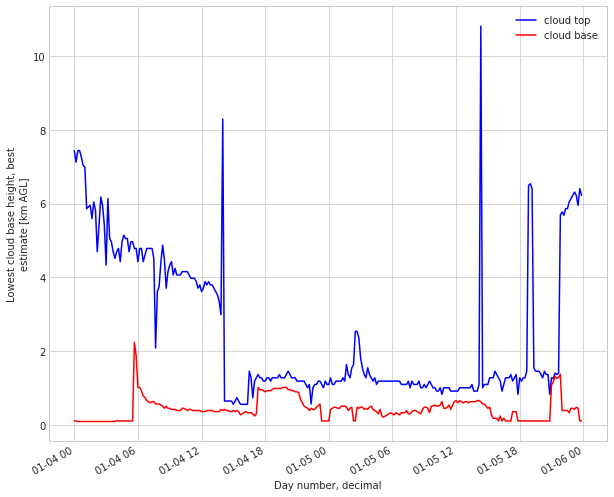

In [48]:
ds_cloud2.ht_e.sel(time=slice('1998-01-04', '1998-01-05')).plot(label='cloud top', c='b')
ds_cloud2.lb_b.sel(time=slice('1998-01-04', '1998-01-05')).plot(label='cloud base', c='r')
plt.legend()

In [54]:
highest = ds_cloud2.ht_e.sel(time=slice('1998-01-04 22:30', '1998-01-04 23:30')).mean()
lowest =  ds_cloud2.lb_b.sel(time=slice('1998-01-04 22:30', '1998-01-04 23:30')).mean()

print(f'Lowest cloud base is {lowest}km and heighest is {highest}km')

Lowest cloud base is <xarray.DataArray 'lb_b' ()>
array(0.371143, dtype=float32)km and heighest is <xarray.DataArray 'ht_e' ()>
array(1.095, dtype=float32)km


In [56]:
highest = ds_cloud2.ht_e.sel(time=slice('1998-01-04 23:00', '1998-01-04 23:30')).mean()
lowest =  ds_cloud2.lb_b.sel(time=slice('1998-01-04 23:00', '1998-01-04 23:30')).mean()
print(f'Lowest cloud base is {lowest}km and heighest is {highest}km')

Lowest cloud base is <xarray.DataArray 'lb_b' ()>
array(0.321, dtype=float32)km and heighest is <xarray.DataArray 'ht_e' ()>
array(1.1175, dtype=float32)km


## 7th Dec Plot

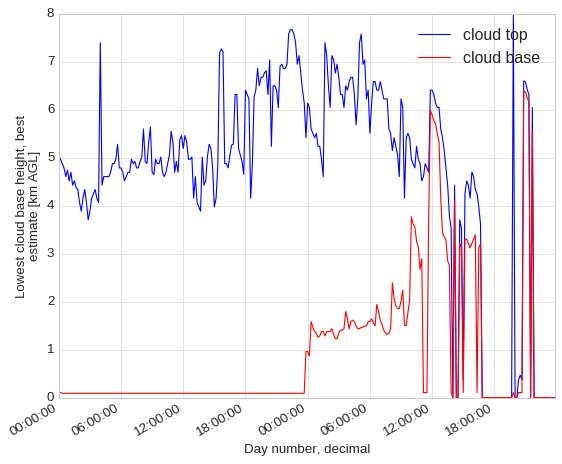

In [76]:
ds_cloud2.ht_e.sel(time=slice('1997-12-07', '1997-12-08')).plot(label='cloud top', c='b')
ds_cloud2.lb_b.sel(time=slice('1997-12-07', '1997-12-08')).plot(label='cloud base', c='r') # lower base
plt.legend();

Consistently high cloud top during both the cloudy events on Dec 7th

## 10th Jan

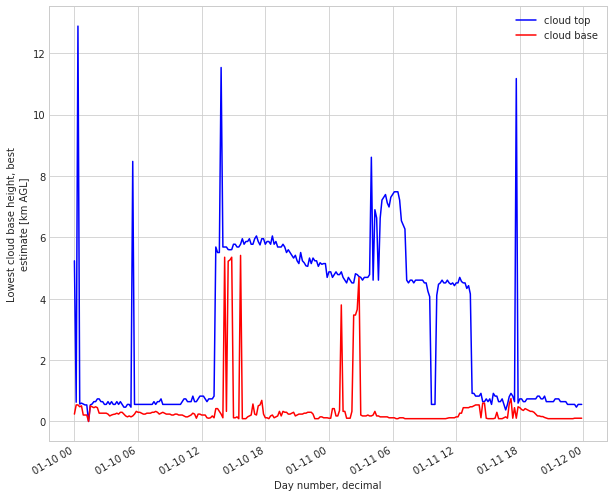

In [61]:
ds_cloud2.ht_e.sel(time=slice('1998-01-10', '1998-01-11')).plot(label='cloud top', c='b')
ds_cloud2.lb_b.sel(time=slice('1998-01-10', '1998-01-11')).plot(label='cloud base', c='r')
plt.legend();

Here the cloud top doesn't shoot high around the cloudy event of 10th Jan 23:00

Clear skies or ice clouds

In [62]:
highest_10_01 = ds_cloud2.ht_e.sel(time=slice('1998-01-10 23:30', '1998-01-11 00:00')).mean().data
lowest_10_01 =  ds_cloud2.lb_b.sel(time=slice('1998-01-10 23:30', '1998-01-11 00:00')).mean().data

print(f'Lowest cloud base is {lowest_10_01:.3f}km and highest is {highest_10_01:.3f}km')

Lowest cloud base is 0.114km and highest is 4.905km


In [64]:
highest = ds_cloud2.ht_e.sel(time=slice('1998-01-10 23:20', '1998-01-10 23:40')).mean()
lowest = ds_cloud2.lb_b.sel(time=slice('1998-01-10 23:20', '1998-01-10 23:40')).mean()
print(f'Lowest cloud base is {lowest}km and highest is {highest}km')

Lowest cloud base is <xarray.DataArray 'lb_b' ()>
array(0.129, dtype=float32)km and highest is <xarray.DataArray 'ht_e' ()>
array(5.137333, dtype=float32)km


## 28th Jan

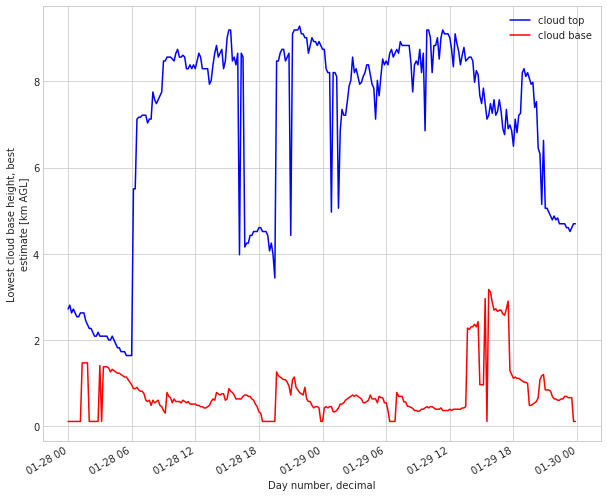

In [65]:
ds_cloud2.ht_e.sel(time=slice('1998-01-28', '1998-01-29')).plot(label='cloud top', c='b')
ds_cloud2.lb_b.sel(time=slice('1998-01-28', '1998-01-29')).plot(label='cloud base', c='r')
plt.legend();

## 27th Feb

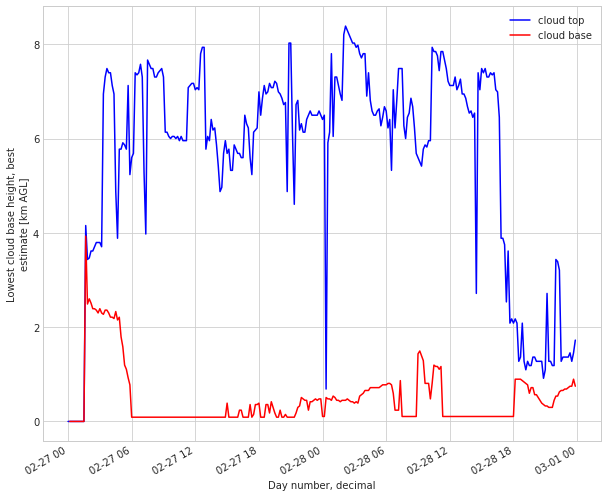

In [66]:
ds_cloud2.ht_e.sel(time=slice('1998-02-27', '1998-02-28')).plot(label='cloud top', c='b')
ds_cloud2.lb_b.sel(time=slice('1998-02-27', '1998-02-28')).plot(label='cloud base', c='r')
plt.legend();

## approach 2

Using bisect to bisect an array

In [13]:
# if the dates are sorted use bisect method, it's the fastest
lower = bisect.bisect_right(t_file, datetime.datetime(1998,1,3,23,50))
upper = bisect.bisect_left(t_file, datetime.datetime(1998,1,5,1))
mask_time = t_file [lower:upper]

In [23]:
mask_time

array([datetime.datetime(1998, 1, 4, 0, 0),
       datetime.datetime(1998, 1, 4, 0, 10, 1, 171868),
       datetime.datetime(1998, 1, 4, 0, 19, 59, 707024),
       datetime.datetime(1998, 1, 4, 0, 30, 0, 878899),
       datetime.datetime(1998, 1, 4, 0, 39, 59, 414055),
       datetime.datetime(1998, 1, 4, 0, 50, 0, 585930),
       datetime.datetime(1998, 1, 4, 0, 59, 59, 121086),
       datetime.datetime(1998, 1, 4, 1, 10, 0, 292961),
       datetime.datetime(1998, 1, 4, 1, 19, 58, 828118),
       datetime.datetime(1998, 1, 4, 1, 30),
       datetime.datetime(1998, 1, 4, 1, 40, 1, 171868),
       datetime.datetime(1998, 1, 4, 1, 49, 59, 707024),
       datetime.datetime(1998, 1, 4, 2, 0, 0, 878899),
       datetime.datetime(1998, 1, 4, 2, 9, 59, 414055),
       datetime.datetime(1998, 1, 4, 2, 20, 0, 585930),
       datetime.datetime(1998, 1, 4, 2, 29, 59, 121086),
       datetime.datetime(1998, 1, 4, 2, 40, 0, 292961),
       datetime.datetime(1998, 1, 4, 2, 49, 58, 828118),
       da

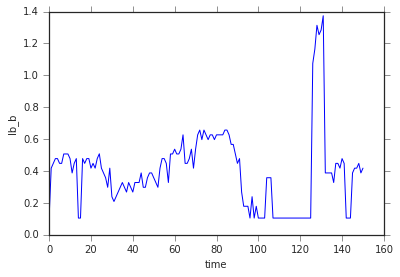

In [24]:
ds_cloud2.lb_b.values[ds_cloud2.lb_b.values == -999] = np.nan
ds_cloud2.lb_b[lower:upper].plot() # lowest cloud base height for 4th Jan in kms

In [15]:
ds_cloud2.ht_e

<xarray.DataArray 'ht_e' (time: 50112)>
array([7.395, 7.395, 7.395, ..., 0.   , 0.   , 0.   ], dtype=float32)
Dimensions without coordinates: time
Attributes:
    long_name:  Highest return height (Highest cloud top, best estimate)
    comment:    Highest return height measured by radar and lidar
    units:      km AGL

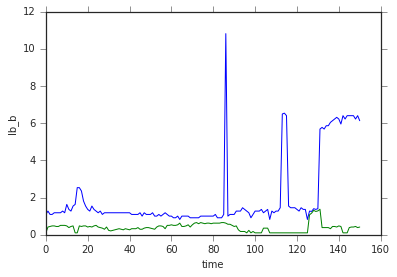

In [25]:
ds_cloud2.ht_e.values[ds_cloud2.ht_e.values == -999] = np.nan
ds_cloud2.ht_e[lower:upper].plot()
ds_cloud2.lb_b[lower:upper].plot() #plotted in green

In [34]:
mask_time[-1] # time goes till  hour ahead on the next day

datetime.datetime(1998, 1, 5, 0, 59, 59, 121086)

In [14]:
import seaborn as sns

# Plot of Cloud base vs Cloud Top

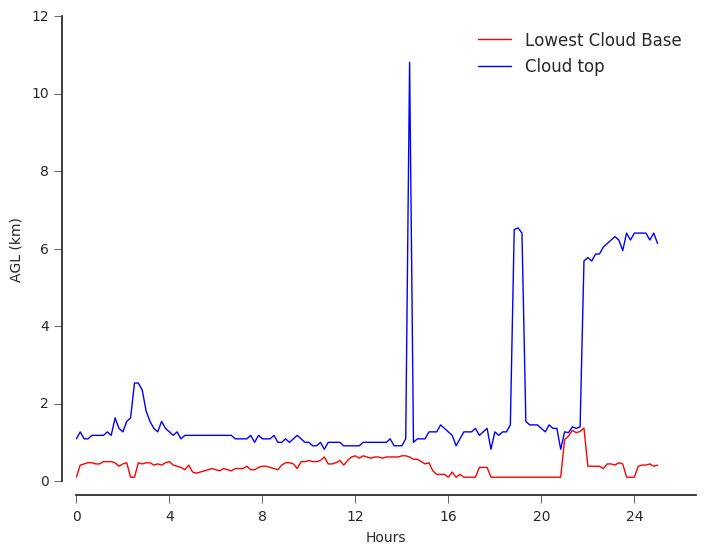

In [30]:
fig, ax = plt.subplots(figsize=(8,6),  dpi=100)
#y = ds_surf.lwp[lower:upper]
#x = np.arange(0,25,1)
ds_cloud2.lb_b[lower:upper].plot(c='red', label='Lowest Cloud Base')
ds_cloud2.ht_e[lower:upper].plot(c='blue', label='Cloud top')
#plt.plot(x,y)
#plt.title('Liquid water path on 4th Jan 1998')
ind = np.arange(0, 156, 24)
ax.set_xticks(ind)
ax.set_xticklabels(('0', '4', '8', '12', '16', '20', '24'))
plt.legend()
#ax.set_xlim(0,24)
ax.set_ylabel('AGL (km)')
ax.set_xlabel('Hours')
sns.despine(offset=10)
sns.set_style("ticks")

High cloud thickness during the time of sounding. Also, stratospheric clouds

Find paper on extent of clouds during mixed phase events?